#### TASK

To tell a story on how the world food shortage problem can be solved using appropriate visuals 

checklist

* visualisations and narratives should include;
* trends in food production and consumption over the years
* average and median food production, the outliers, quartiles and interquartiles ranges (boxplot)
* A comparison between average food consumption and production for each year

#### Dataset description
the datasets used for this project are [African food production dataset from 2004 to 2013](https://docs.google.com/spreadsheets/d/1MacgHw6Y4wSaoDiI7ZrosEMT3KCcZsQsHsDvdoPuftY/edit#gid=991431281) and [African food supply dataset from 2004 to 2013](https://docs.google.com/spreadsheets/d/1Ec9Djt2DIXTt7Tk6gpFvGOkvQ9Tr8tZ9VGsFi_gUHHI/edit#gid=1591666309)

The food production dataset contains 4 columns namely; country, item (item produced), year and value and 23110 rows. The unit of the food production value is in Kilotons (kt)

The food supply dataset contains 3 columns namely; country, year, value and 450 rows. The unit of the food supply value is in kcal/person/day

food production and food supply datasets contain data for 45 African countries

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#food production dataset
food_prod= pd.read_csv('Africa Food Production (2004 - 2013).csv')
#food supply dataset
food_sup = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
#food_sup

In [3]:
#inspecting food supply dataframe
print(food_sup.head())
print('_______________________________')
print(food_sup.tail())

   Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048
_______________________________
      Country  Year  Value
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110


In [4]:
#inspecting food production dataframe
print(food_prod.head())
print('-------------------------------------')
print(food_prod.tail())

   Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111
-------------------------------------
        Country         Item  Year  Value
23105  Zimbabwe  Crustaceans  2009      0
23106  Zimbabwe  Crustaceans  2010      0
23107  Zimbabwe  Crustaceans  2011      0
23108  Zimbabwe  Crustaceans  2012      0
23109  Zimbabwe  Crustaceans  2013      0


In [5]:
#checking the concise summary of both dataframes
print(food_prod.info())
print('____________________________________')
print(food_sup.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB
None
____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB
None


In [6]:
#checking for missing values in the dataframes
print(food_prod.isna().sum())
print('______________________')
print(food_sup.isna().sum())

Country    0
Item       0
Year       0
Value      0
dtype: int64
______________________
Country    0
Year       0
Value      0
dtype: int64


In [7]:
#statistical summary of food production dataframe
food_prod.describe(include='all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Bovine Meat,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [8]:
#statistical summary of food supply dataframe
food_sup.describe(include='all')

,Country,Year,Value
count,450,450.000000,450.000000
unique,45,NaN,NaN
top,Malawi,NaN,NaN
freq,10,NaN,NaN
mean,NaN,2008.500000,2469.775556
std,NaN,2.875478,379.140143
min,NaN,2004.000000,1781.000000
25%,NaN,2006.000000,2174.000000
50%,NaN,2008.500000,2376.000000
75%,NaN,2011.000000,2681.750000


## Data Exploration

### Trends in food production over the years

In [9]:
#average production value by year
food_prod.groupby('Year')['Value'].mean()

Year
2004    286.767301
2005    298.986592
2006    310.814014
2007    305.215830
2008    318.686851
2009    323.040657
2010    340.166955
2011    351.303633
2012    364.831816
2013    378.227568
Name: Value, dtype: float64

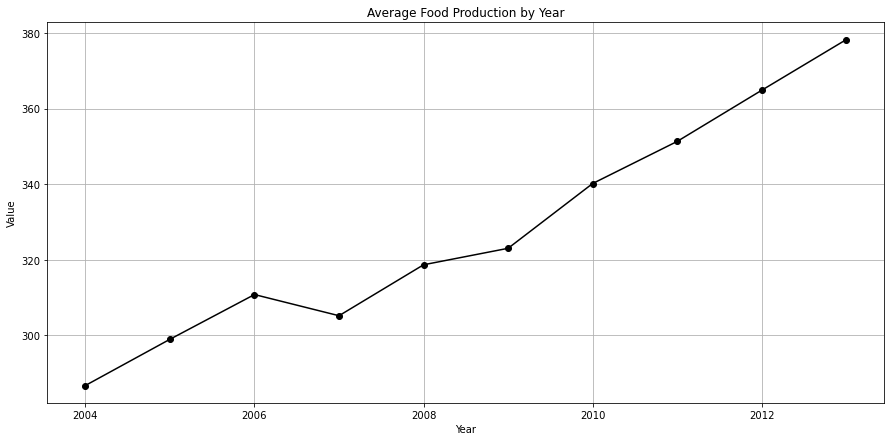

In [10]:
#plotting line chart to show trends over the years
fig= plt.figure(figsize=(15, 7))
plt.plot(food_prod.groupby('Year')['Value'].mean(), marker='o', color='black')
plt.title('Average Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('food prod by year.jpg')

The chart above shows food production trends from 2004 to 2013. Food production in Africa increased significantly from 2004 till 2013.

In [11]:
#Median food production by year
food_prod.groupby('Year')['Value'].median()


Year
2004    16
2005    16
2006    17
2007    17
2008    18
2009    18
2010    20
2011    21
2012    21
2013    22
Name: Value, dtype: int64

### Average food production by country

In [12]:
#creating a new dataframe called country production... it contains the average production value for each country
country_prod= pd.DataFrame(food_prod.groupby('Country')['Value'].mean()).reset_index(inplace=False) 

In [13]:
country_prod

,Country,Value
0,Algeria,325.258621
1,Angola,362.035185
2,Benin,149.274576
3,Botswana,14.141176
4,Burkina Faso,232.858140
5,Cabo Verde,5.024242
6,Cameroon,304.107692
7,Central African Republic,55.380000
8,Chad,115.584615
9,Congo,51.582000


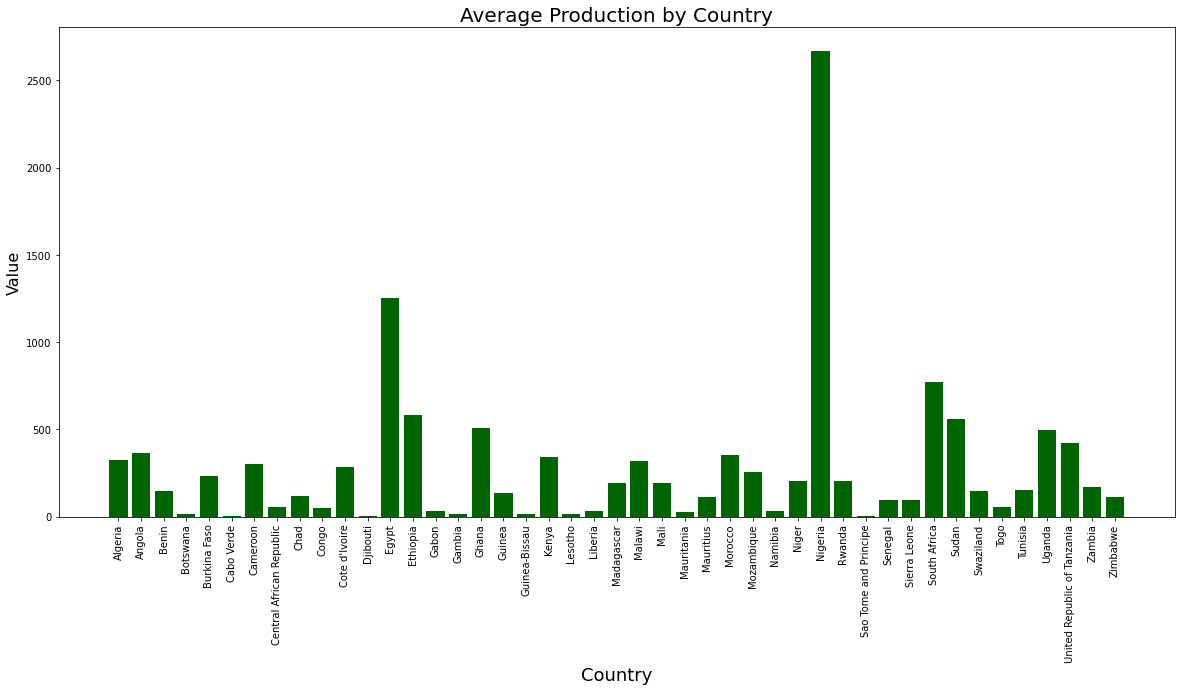

In [14]:
#bar chart showing production value by country
fig= plt.figure(figsize=(20, 9))
plt.bar(country_prod['Country'],country_prod['Value'],color='darkgreen')
plt.title('Average Production by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Food Production by Country')

**The top food producing countries in Africa are Nigeria, Egypt and South Africa.**

### Food Items Produced in Africa (from the highest to the lowest based on average values)

In [15]:
item_prod= pd.DataFrame(food_prod.groupby('Item')['Value'].mean()).reset_index(inplace=False)

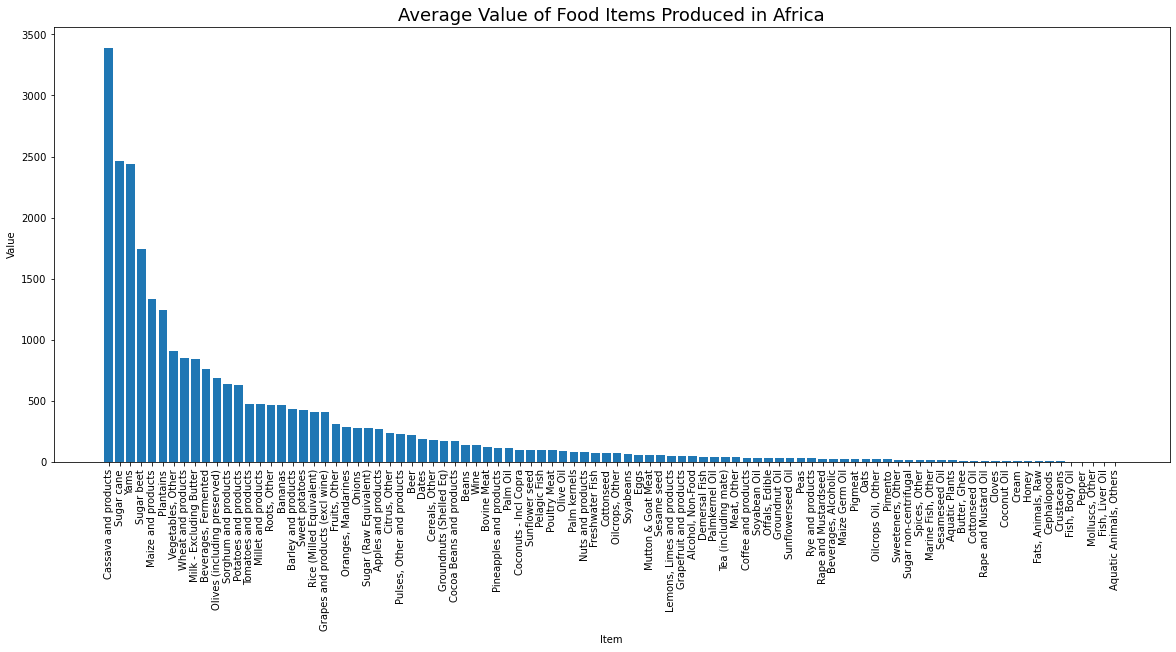

In [16]:
item_sorted= item_prod.sort_values('Value', ascending=False)
fig= plt.figure(figsize=(20,8))
# make bar plot with matplotlib
plt.bar('Item', 'Value',data=item_sorted)
plt.xlabel("Item")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Average Value of Food Items Produced in Africa", size=18)
plt.show()
fig.savefig('Food Produced in Africa.jpg')

The top food items produced in Africa are: Cassava and its products, Sugar cane, Yams, Sugar beet, maize and its products, and Plantains

### Average food supply by each country

In [17]:
country_sup= pd.DataFrame(food_sup.groupby('Country')['Value'].mean()).reset_index(inplace=False)

In [18]:
country_sup

,Country,Value
0,Algeria,3111.8
1,Angola,2255.6
2,Benin,2537.8
3,Botswana,2226.3
4,Burkina Faso,2607.2
5,Cabo Verde,2551.4
6,Cameroon,2460.3
7,Central African Republic,2071.9
8,Chad,2051.1
9,Congo,2153.0


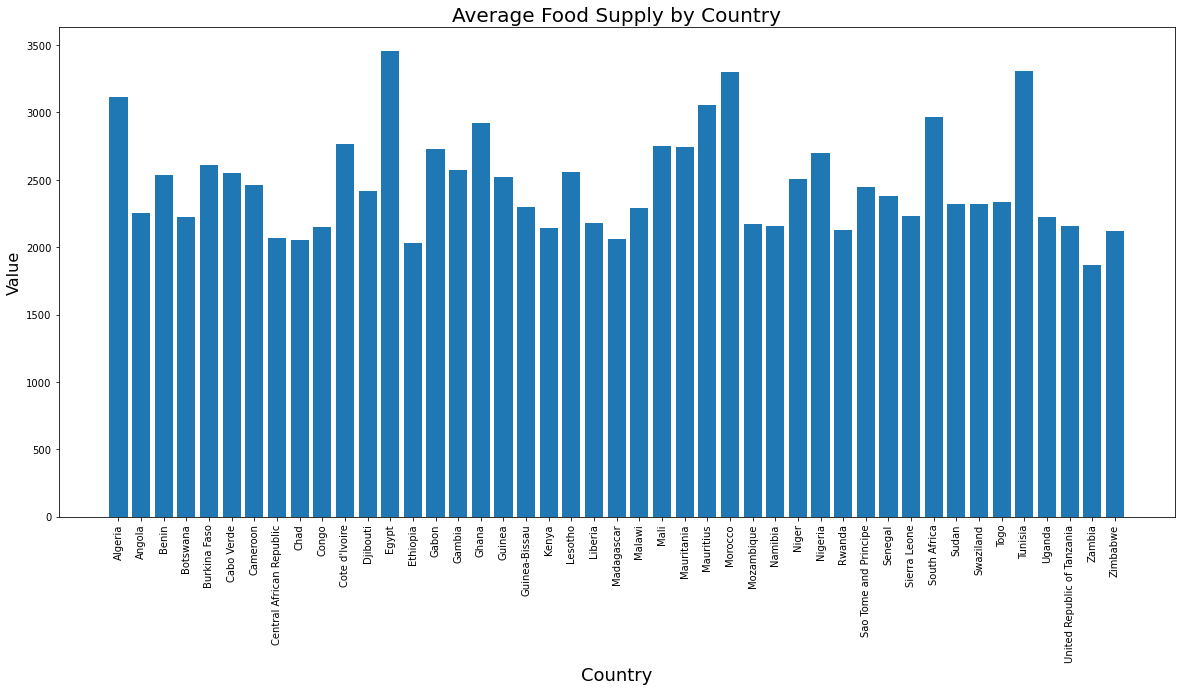

In [19]:
fig= plt.figure(figsize=(20, 9))
plt.bar('Country','Value', data= country_sup)
plt.title('Average Food Supply by Country', fontsize=20)
plt.xlabel('Country',fontsize=18)
plt.ylabel('Value',fontsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Food Supply by Country.jpg')

**The countries that supply the most food are Egypt, Morocco and Tunisia**

### Trends in food supply over the years

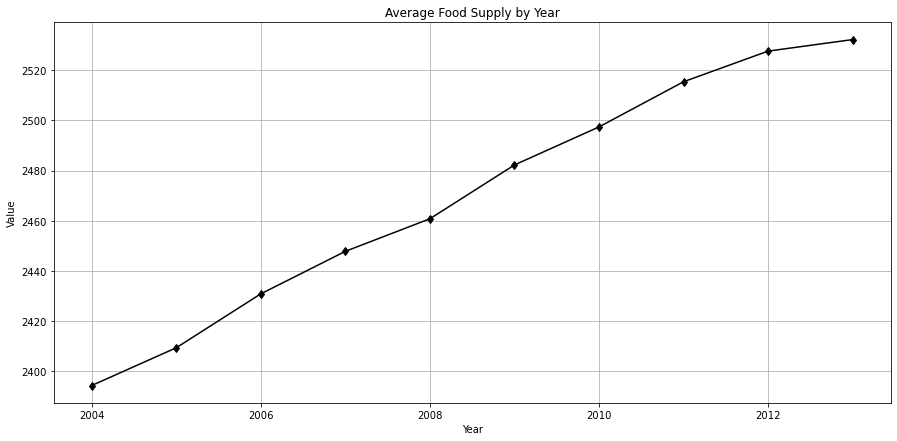

In [20]:
#plotting line chart to show trends
fig= plt.figure(figsize=(15, 7))
plt.plot(food_sup.groupby('Year')['Value'].mean(), marker='d', color='black')
plt.title('Average Food Supply by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('Food Supply by Year.jpg')

**Comparison between average food consumption and production for each year**

In [21]:
#creating a new dataframe that shows the average number of food item produced each year
food_prod2=pd.DataFrame(food_prod.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_prod2

,Year,Value
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [22]:
#renaming the value column to reflect what the new column stands for
food_prod2.rename(columns={"Value": "avg_food_produced"}, inplace=True)

In [23]:
food_prod2

,Year,avg_food_produced
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [24]:
#creating a new dataframe that shows the average number of food item supplied each year
food_sup2=pd.DataFrame(food_sup.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_sup2

,Year,Value
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556
5,2009,2482.222222
6,2010,2497.400000
7,2011,2515.422222
8,2012,2527.644444
9,2013,2532.244444


In [25]:
#renaming the value column to reflect what the new column stands for
food_sup2.rename(columns={"Value": "avg_food_supplied"}, inplace=True)

In [26]:
food_sup2

,Year,avg_food_supplied
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556
5,2009,2482.222222
6,2010,2497.400000
7,2011,2515.422222
8,2012,2527.644444
9,2013,2532.244444


merging new dataframes created by the year column so we can compare food consumption/supply and production for each year

In [27]:
prod_n_sup = pd.merge(food_prod2, food_sup2, on='Year')
prod_n_sup

,Year,avg_food_produced,avg_food_supplied
0,2004,286.767301,2394.222222
1,2005,298.986592,2409.288889
2,2006,310.814014,2430.800000
3,2007,305.215830,2447.755556
4,2008,318.686851,2460.755556
5,2009,323.040657,2482.222222
6,2010,340.166955,2497.400000
7,2011,351.303633,2515.422222
8,2012,364.831816,2527.644444
9,2013,378.227568,2532.244444


**creating a chart to show the average number of food produced and consumed for each year**

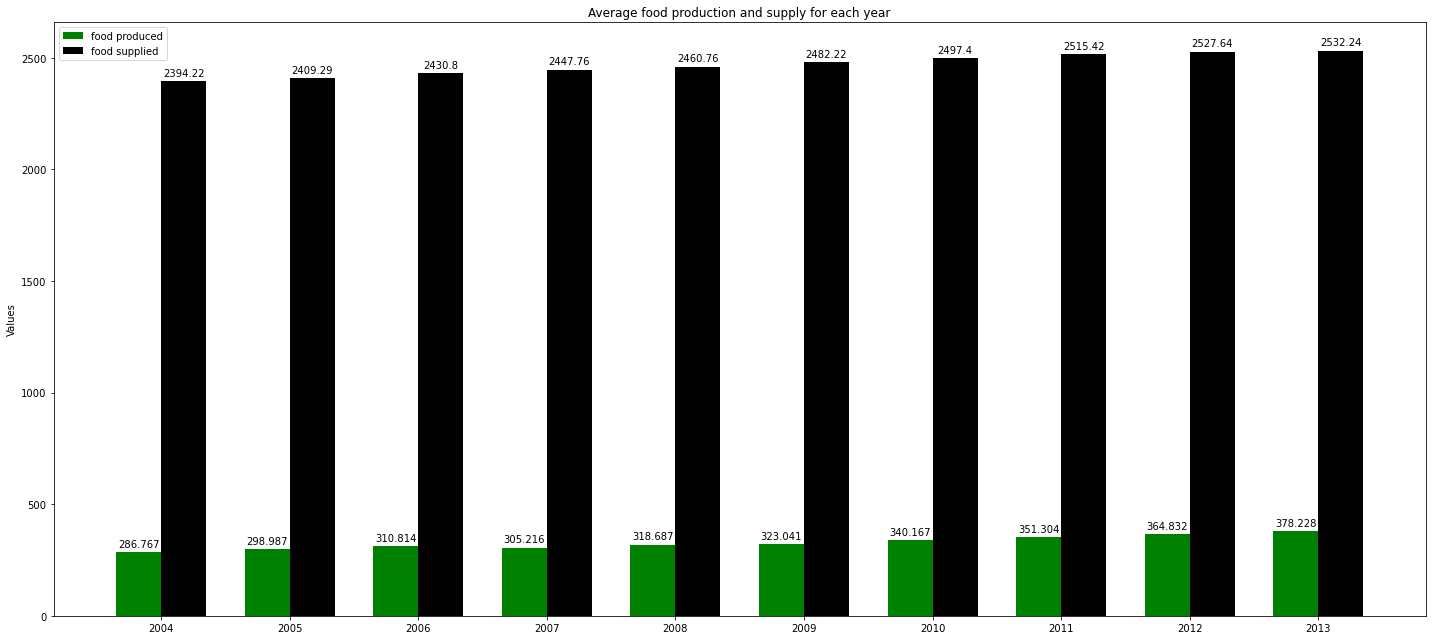

In [28]:
fig= plt.figure(figsize=(20,9))
x = np.arange(len(prod_n_sup['Year']))  # the year locations
width = 0.35  # the width of the bars

ax = fig.add_subplot()
rects1 = ax.bar(x - width/2, prod_n_sup['avg_food_produced'], width, label='food produced', color='green')
rects2 = ax.bar(x + width/2, prod_n_sup['avg_food_supplied'], width, label='food supplied', color='black')

ax.set_ylabel('Values')
ax.set_title('Average food production and supply for each year')
ax.set_xticks(x)
ax.set_xticklabels(prod_n_sup['Year'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
fig.savefig('Food Production vs Supply.jpg')

**The chart above shows that food consumption rate in Africa is way higher than food production rate**

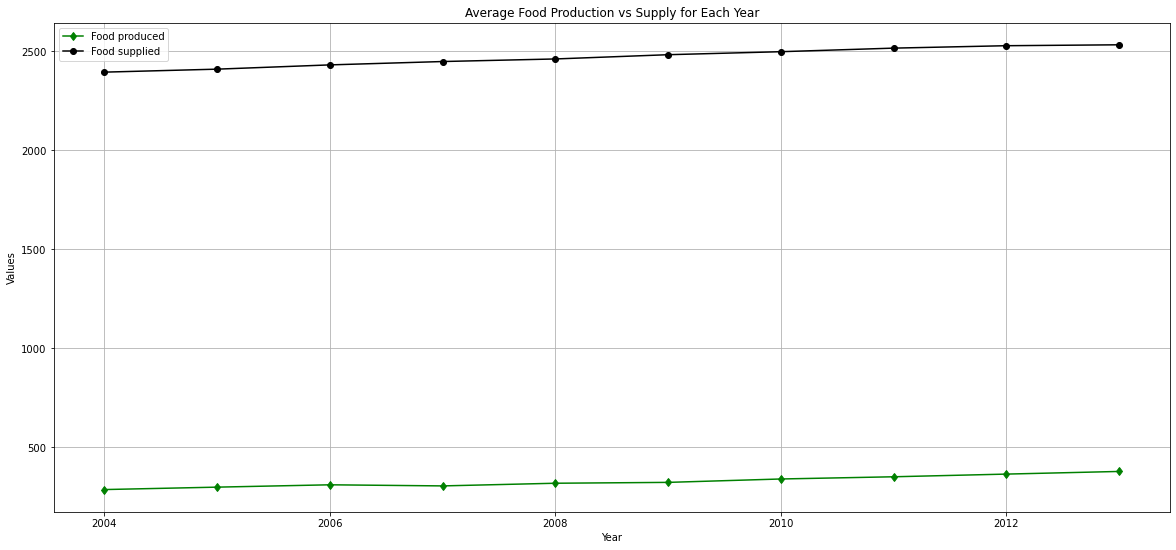

In [29]:
fig= plt.figure(figsize=(20,9))

ax = fig.add_subplot() 
ax.plot(prod_n_sup['Year'],prod_n_sup['avg_food_produced'],marker='d', label="Food produced", color='green')
ax.plot(prod_n_sup['Year'],prod_n_sup['avg_food_supplied'],marker='o', label="Food supplied", color='black')

ax.set_ylabel('Values')
ax.set_title('Average Food Production vs Supply for Each Year')
ax.set_xlabel('Year')
ax.legend()
plt.grid()
plt.show()
fig.savefig('production vs supply.jpg')

### Average and Median Food Production

In [30]:
#average and median food production
average_food_production= food_prod['Value'].mean()
print(f" The average number of food produced in Africa from 2004 to 2013 is {round(average_food_production,2)}kt")

median_food_production= food_prod['Value'].median()
print(f" The median food production value is {median_food_production}kt")

 The average number of food produced in Africa from 2004 to 2013 is 327.79kt
 The median food production value is 18.0kt


### Outliers

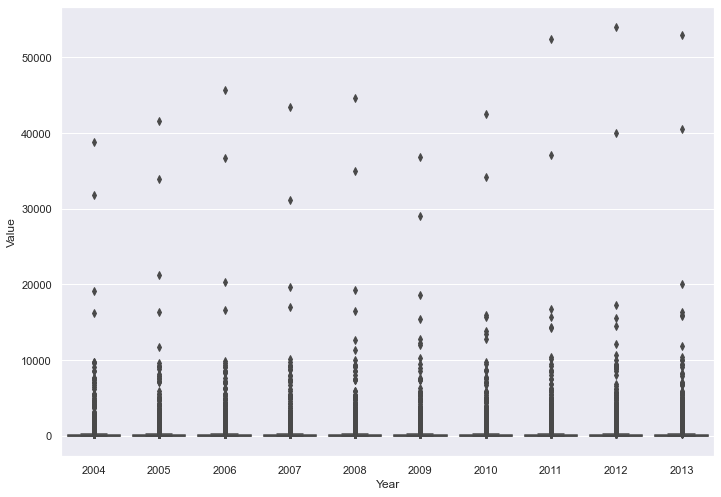

In [31]:
#boxplot for food production data
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns_p = sns.boxplot(x = 'Year', y = 'Value', data = food_prod)
fig= sns_p.get_figure()
plt.show()
fig.savefig('prod_outlier.jpg')

There are so many outliers in the food production data

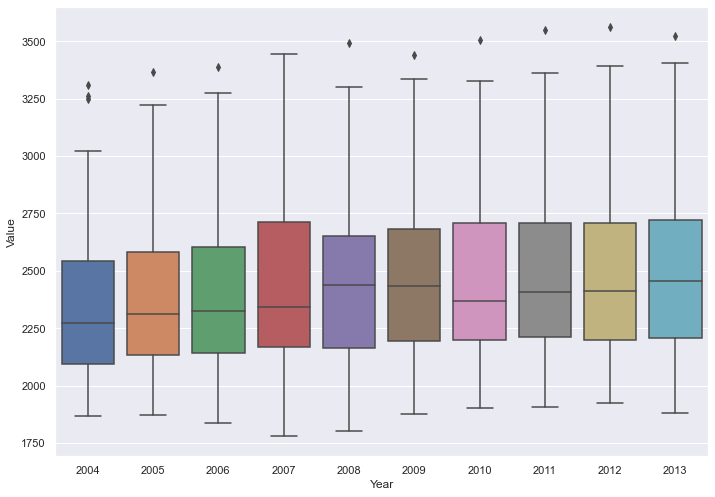

In [32]:
#box plot for food supply dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_sup)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('supply_outliers.jpg')

### Investigating Outliers

##### Interquartile ranges (IQR)

In [33]:
#25th percentile Q1
Q1= np.percentile(food_prod['Value'],25)
print(f"The Q1 value for food production data is {Q1}")

#75th percentile Q3
Q3= np.percentile(food_prod['Value'],75)
print(f"The Q3 value for food production data is {Q3}")

#Calculating the IQR
IQR= Q3-Q1
print(f"The IQR for food production data is {IQR}")

The Q1 value for food production data is 3.0
The Q3 value for food production data is 108.0
The IQR for food production data is 105.0


In [34]:
#calculating lower bound and upper bound values
lower_bound= Q1 - (1.5 * IQR)
print(f"lower_bound value for food production data is {lower_bound}")

upper_bound= Q3 + (1.5 * IQR)
print(f"upper_bound value for food production data is {upper_bound}")

lower_bound value for food production data is -154.5
upper_bound value for food production data is 265.5


In [35]:
prod_outlier = food_prod[((food_prod['Value'] <= (lower_bound)) |(food_prod['Value'] >= (upper_bound)))]
prod_outlier. sort_values("Value", ascending= False)

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000
15449,Nigeria,Cassava and products,2013,53000
15447,Nigeria,Cassava and products,2011,52403
15442,Nigeria,Cassava and products,2006,45721
15444,Nigeria,Cassava and products,2008,44582
...,...,...,...,...
4285,Chad,Milk - Excluding Butter,2009,266
18038,South Africa,Sunflowerseed Oil,2012,266
443,Algeria,Poultry Meat,2007,266
9741,Kenya,Beer,2005,266


Based on the lower and upper bound calculations, there are 3696 outliers in the food production dataset with extreme outliers which in this case are the food production values in Nigeria for each year

**Investigating outliers in the food supply dataset**

In [36]:
#25th percentile Q1
quartile_1= np.percentile(food_sup['Value'],25)
print(f"The Q1 value of the food supply data is {quartile_1}")

#75th percentile Q3
quartile_3= np.percentile(food_sup['Value'],75)
print(f"The Q3 value of the food supply data is {quartile_3}")

The Q1 value of the food supply data is 2174.0
The Q3 value of the food supply data is 2681.75


In [37]:
#Calculating the IQR
IQR= quartile_3-quartile_1
print(f" The IQR value of the food supply data is {IQR}")

 The IQR value of the food supply data is 507.75


In [38]:
#calculating lower bound and upper bound values
lower_bound= quartile_1 - (1.5 * IQR)
print(f"The lower_bound value for the food supply data is {lower_bound}")

upper_bound= quartile_3 + (1.5 * IQR)
print(f"The upper_bound value for the food supply data is {upper_bound}")

The lower_bound value for the food supply data is 1412.375
The upper_bound value for the food supply data is 3443.375


any value below the lower bound or above the upper bound is considered an outlier

In [39]:
sup_outlier = food_sup[((food_sup['Value'] <= (lower_bound)) |(food_sup['Value'] >= (upper_bound)))]
sup_outlier

,Country,Year,Value
123,Egypt,2007,3445
124,Egypt,2008,3490
126,Egypt,2010,3507
127,Egypt,2011,3549
128,Egypt,2012,3561
129,Egypt,2013,3522


**Although Nigeria produced the highest number of food, Egypt had the most food supplies/consumption in Africa from 2007 till 2013**

## QUIZ ANSWERS

**1. which country produced the highest amount of oats in 2010 ?**

In [40]:
#subset of the food production dataset showing food produced
#in 2010
_2010= food_prod[food_prod.Year.eq(2010)]
_2010

,Country,Item,Year,Value
6,Algeria,Wheat and products,2010,2605
16,Algeria,Rice (Milled Equivalent),2010,0
26,Algeria,Barley and products,2010,1308
36,Algeria,Maize and products,2010,0
46,Algeria,Oats,2010,88
...,...,...,...,...
23066,Zimbabwe,"Fats, Animals, Raw",2010,7
23076,Zimbabwe,Eggs,2010,30
23086,Zimbabwe,Milk - Excluding Butter,2010,396
23096,Zimbabwe,Freshwater Fish,2010,13


In [41]:
#subset of the dataframe showing countries that produced Oats
_2010[(_2010 == 'Oats').any(axis=1)] 

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
7746,Ghana,Oats,2010,0
9286,Kenya,Oats,2010,3
10026,Lesotho,Oats,2010,0
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


##### The country that produced the highest amount of oats in 2010 is Algeria

**2. which three countries have the lowest food supply between 2004 and 2006 ?**

In [42]:
#creating supply dataframe that shows food supply between 2004 and 2006
supply= food_sup[(food_sup['Year'] >= 2004) & (food_sup['Year'] <= 2006)]

In [43]:
#grouping the dataframe by country to be able to sum up values 
# by country
grouped_df= supply. groupby("Country")

In [44]:
#creating a new column in the dataframe that shows the total number of food
#supplied to each country without altering the orignal dataframe
#using the transform function to create an aggregated sum
food_sup['total'] = grouped_df[["Value"]]. transform(sum)

In [45]:
pd.set_option('display.max_rows', None) #display all rows

#sorting the dataframe by the aggregated sum of food supplied 
#to each country from the lowest to the highest
food_sup. sort_values("total", ascending=True)

,Country,Year,Value,total
432,Zambia,2006,1838,5577.0
431,Zambia,2005,1873,5577.0
430,Zambia,2004,1866,5577.0
132,Ethiopia,2006,1967,5827.0
131,Ethiopia,2005,1978,5827.0
130,Ethiopia,2004,1882,5827.0
70,Central African Republic,2004,1989,6044.0
72,Central African Republic,2006,2029,6044.0
71,Central African Republic,2005,2026,6044.0
322,Rwanda,2006,2044,6050.0


###### Zambia, Ethopia and Central African Republic had the lowest food supply between 2004 and 2006